# Decision tree regression from SKLearn over Breast Cancer Dataset
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Cancer) has two or more branches (e.g., Benign and Malignant), each representing values for the attribute tested. Leaf node (e.g., Radius Mean,Texture Mean) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.
# ----------------------------------------------------------------------------------------------------------
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

# ----------------------------------------------------------------------------------------------------------
### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).

In [2]:
data = pd.read_csv('Breast_Cancer_Data.csv')

Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [3]:
data.drop([data.columns[0],data.columns[32]],axis=1,inplace=True)
data['diagnosis'].replace(["B","M"],[0,1],inplace=True)

Preprocessing Data

In [4]:
x = data.iloc[:,3:4].values
y = data['diagnosis'].values

# ----------------------------------------------------------------------------------------------------------
## Mean Square & Mean Absolute Error
Function returns the value error in the training of the model while predicting the target variable.<br>
##### Mean Square Error :
Mean Square Error (MSE). It is the standard deviation of how far from the regression line data points are. In other words, it tells you how concentrated the data is around the line of best fit.
##### Mean Absolute Error :
Mean Absolute Error (MAE). It is the absolute standard deviation of how far from the regression line data points are.
##### Score :
R^2 Score function is use to return the score value in the data provide.

In [5]:
def calculate_error(model,test_data,test_label):
    predict = model.predict(test_data)
    mse = mean_squared_error(test_label,predict)
    mae = mean_absolute_error(test_label,predict)
    score = model.score(test_data,test_label)
    return mse,mae,score

### Regression Fitting
Fitting the regressor to the data

In [6]:
regressor=DecisionTreeRegressor()
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predicting the result

In [7]:
mse,mae,score = calculate_error(regressor,x,y)
print("Mean Square Error in Data : {}\nMean Absolute Error in Data : {}\nScore in Data : {}".format(mse,mae,score))

Mean Square Error in Data : 0.006444053895723492
Mean Absolute Error in Data : 0.012888107791446984
Score in Data : 0.972433627539066


Plotting the regression line

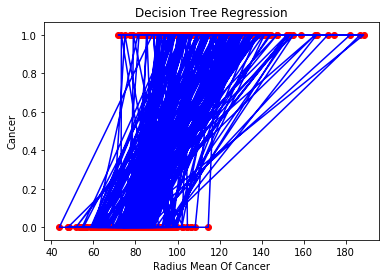

In [8]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Radius Mean Of Cancer')
plt.ylabel('Cancer')
plt.show()